In [129]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam (2).csv
User uploaded file "spam.csv" with length 503663 bytes


# Reading File

In [130]:
import pandas as pd
df = pd.read_csv ('spam.csv',encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. Begin data exploration !


Done by Brinda

In [131]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [132]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [133]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [134]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [135]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df['message_length'] = df['message'].apply(len)
df

,label,message,label_num,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [136]:
df.duplicated().sum()

403

In [137]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.shape

(5169, 4)

Text(0, 0.5, 'Number of Data points')

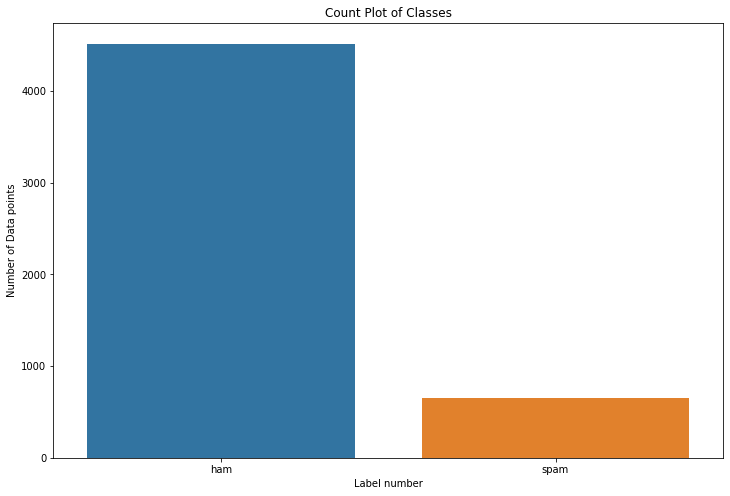

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df['label'])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Label number")
fg.set_ylabel("Number of Data points")

In [139]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

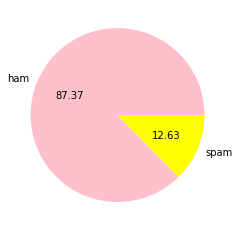

In [140]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f", colors=["pink", "yellow"])
plt.show()

Data is imbalanced

Done by Caroline

In [141]:
# Check statistics of length: real messages may have more variation in length
df.loc[df['label'] == 'ham'].describe()

,label_num,message_length
count,4516.0,4516.000000
mean,0.0,70.459256
std,0.0,56.358207
min,0.0,2.000000
25%,0.0,34.000000
50%,0.0,52.000000
75%,0.0,90.000000
max,0.0,910.000000


In [142]:
df.loc[df['label'] == 'spam'].describe()

,label_num,message_length
count,653.0,653.000000
mean,1.0,137.891271
std,0.0,30.137753
min,1.0,13.000000
25%,1.0,132.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


Done by Atharav

In [143]:
# looking for null values in data set
df.subset=df[['label','message']]


<ipython-input-143-b19a1bc76191>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.subset=df[['label','message']]


In [144]:
df.subset.isna().sum()

label      0
message    0
dtype: int64

No null values present

# 2. Preprocessing 

Done by Caroline

In [145]:
# Some common text preprocessing steps
import string

def remove_punctuation(text):
  for punct in string.punctuation:
    text = text.replace(punct, " ")
  return text

def remove_contraction(text):
  # Since we have split contractions by punctuation marks, remove the endings of the contractions from messages.
  # These characters as standalone words do not convey meaning so they can be stripped.
  contraction_endings = ['s', 't', 'd', 'll', 're', 'm']
  return " ".join([word for word in str(text).split() if word not in contraction_endings])

# Lower case
df.loc[:,'preprocess_text'] = df['message'] # Keeping original text in case needed
df.loc[:,'preprocess_text'] = df['preprocess_text'].str.lower()

from collections import Counter
print("Top 100 words")
print(Counter(" ".join(df['preprocess_text']).split()).most_common(100))
# Printing out the top common words reveals that it would be a good idea to remove stop words
# from dataset during more preprocessing.

# List of common stopwords to remove
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])


df.loc[:,'preprocess_text'] = df['preprocess_text'].apply(lambda text: remove_punctuation(text))
df.loc[:,'preprocess_text'] = df['preprocess_text'].apply(lambda text: remove_contraction(text))
df.loc[:,'preprocess_text'] = df['preprocess_text'].apply(lambda text: remove_stopwords(text))

df

Top 100 words
[('i', 2095), ('to', 2055), ('you', 1832), ('a', 1281), ('the', 1223), ('and', 919), ('u', 890), ('in', 785), ('is', 766), ('my', 676), ('for', 653), ('your', 618), ('me', 579), ('of', 552), ('have', 532), ('on', 476), ('call', 468), ('are', 457), ('that', 453), ('it', 440), ('2', 423), ('so', 404), ('but', 401), ('at', 379), ('not', 377), ('or', 375), ("i'm", 366), ('can', 363), ('be', 361), ('get', 353), ('will', 345), ('just', 339), ('with', 338), ('if', 338), ('do', 331), ('we', 329), ('ur', 314), ('this', 293), ('from', 264), ('when', 261), ('up', 260), ('&lt;#&gt;', 254), ('go', 253), ('how', 251), ('all', 240), ('no', 238), ('what', 238), ('now', 229), ('got', 227), ('4', 226), ('like', 224), ('know', 212), ('was', 209), ('out', 208), ('am', 203), ('free', 201), ('come', 201), ('then', 198), ('its', 194), ('?', 183), ('good', 183), ('want', 177), ('he', 171), ('.', 168), ('only', 167), ('send', 161), ('...', 160), ('time', 160), ('text', 158), ('by', 156), ('going'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,label_num,message_length,preprocess_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,2nd time tried 2 contact u u å£750 pound prize...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like interested buying some...


Done by Vinh

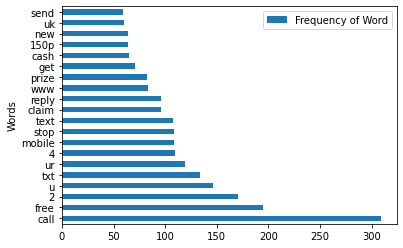

In [146]:
#spam messages
spam=df.loc[df['label'] == 'spam']
spam_common=Counter(" ".join(spam["preprocess_text"]).split()).most_common(20)
spam_df=pd.DataFrame(spam_common)
spam_df.columns=['Words','Frequency of Word']
spam_df.plot.barh(x='Words')

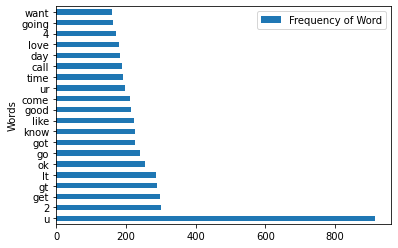

In [147]:
#ham messages
ham=df.loc[df['label'] == 'ham']
ham_common=Counter(" ".join(ham["preprocess_text"]).split()).most_common(20)
ham_df=pd.DataFrame(ham_common)
ham_df.columns=['Words','Frequency of Word']
ham_df.plot.barh(x='Words')

Looking at the graph, spam messages tend to have more words involving the person being messaged like "you", "your", "to" and actions like "call". One word that is interesting in spam is the word "free" and "txt". Many spam calls entice people through words like "free","claim","cash".

Done by Brinda and Naomi


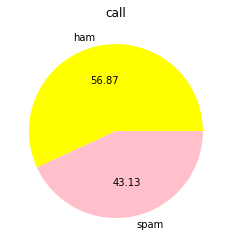

56.873822975517896% of messages containing the word "call" are spam


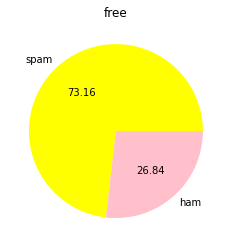

73.16017316017316% of messages containing the word "free" are spam


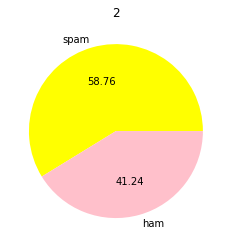

58.75634517766497% of messages containing the word "2" are spam


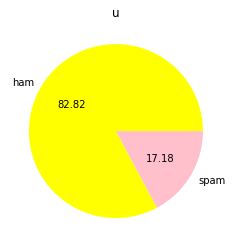

17.184586699813547% of messages containing the word "u" are spam


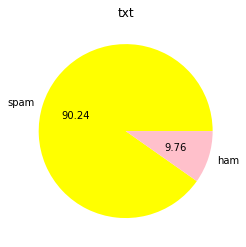

90.2439024390244% of messages containing the word "txt" are spam


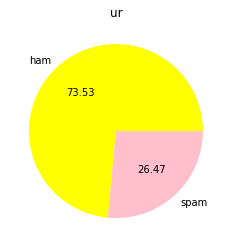

26.474442988204455% of messages containing the word "ur" are spam


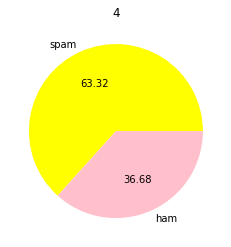

63.32179930795848% of messages containing the word "4" are spam


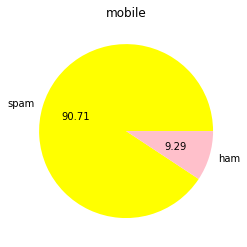

90.71428571428571% of messages containing the word "mobile" are spam


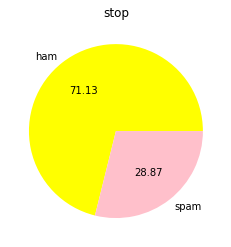

71.12676056338029% of messages containing the word "stop" are spam


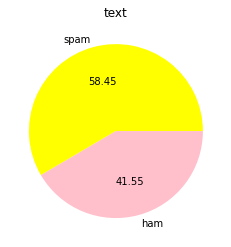

58.454106280193244% of messages containing the word "text" are spam


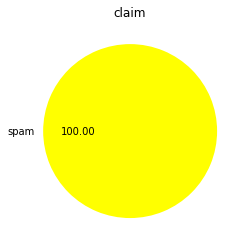

100.0% of messages containing the word "claim" are spam


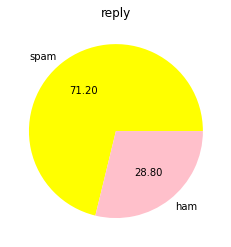

71.2% of messages containing the word "reply" are spam


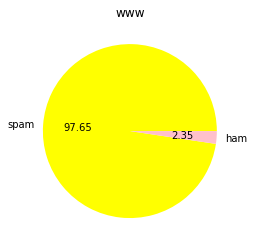

97.6470588235294% of messages containing the word "www" are spam


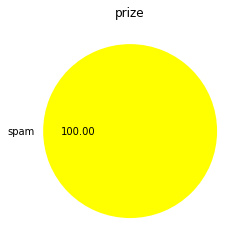

100.0% of messages containing the word "prize" are spam


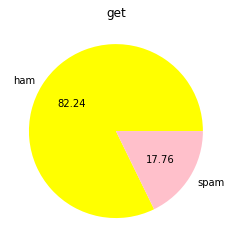

17.763157894736842% of messages containing the word "get" are spam


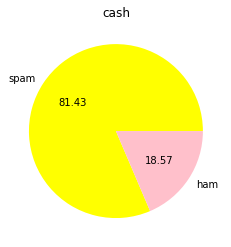

81.42857142857143% of messages containing the word "cash" are spam


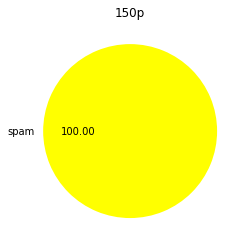

100.0% of messages containing the word "150p" are spam


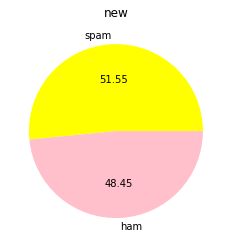

48.4472049689441% of messages containing the word "new" are spam


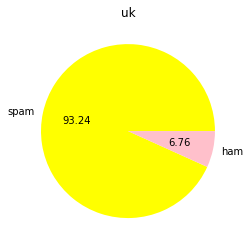

93.24324324324324% of messages containing the word "uk" are spam


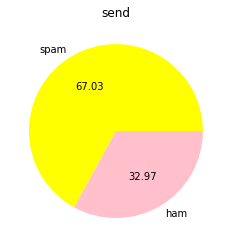

32.967032967032964% of messages containing the word "send" are spam


In [148]:
# plots pie chart to show percentage that the common spam words are in spam and ham messages
for i in range(len(spam_df)):
  new=df.loc[df['preprocess_text'].str.contains(spam_df['Words'][i])]
  spam=new.loc[new['label'] == 'spam']
  ham=new.loc[new['label'] == 'ham']
  plt.pie(new['label'].value_counts(), labels=new['label'].unique(),autopct="%0.2f", colors=["yellow", "pink"])

  plt.title(spam_df['Words'][i])
  plt.show()
  percentage=len(spam)/len(new)*100
  print(f'{percentage}% of messages containing the word \"'+spam_df['Words'][i]+'\" are spam') 

10.0% of messages containing the word but are spam


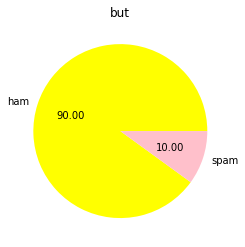

In [149]:
new=df.loc[df['preprocess_text'].str.contains('but')]
spam=new.loc[new['label'] == 'spam']
ham=new.loc[new['label']=='ham']
percentage=len(spam)/len(new)*100
print(f'{percentage}% of messages containing the word but are spam')
plt.pie(new['label'].value_counts(), labels=new['label'].unique(),autopct="%0.2f", colors=["yellow", "pink"])
plt.title('but')
plt.show()

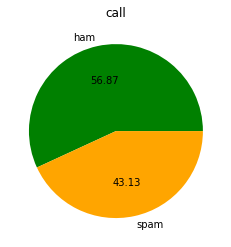

56.873822975517896% of messages containing the word "call" are spam


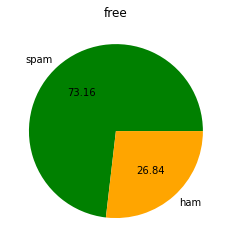

73.16017316017316% of messages containing the word "free" are spam


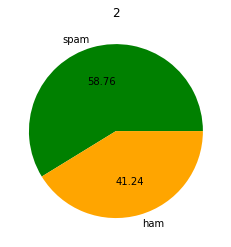

58.75634517766497% of messages containing the word "2" are spam


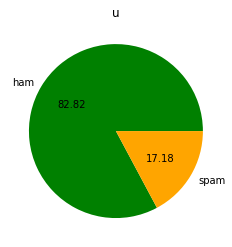

17.184586699813547% of messages containing the word "u" are spam


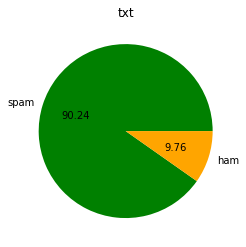

90.2439024390244% of messages containing the word "txt" are spam


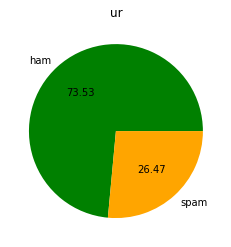

26.474442988204455% of messages containing the word "ur" are spam


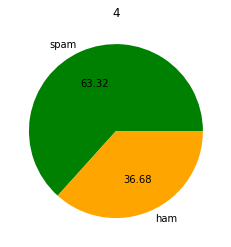

63.32179930795848% of messages containing the word "4" are spam


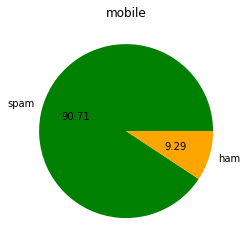

90.71428571428571% of messages containing the word "mobile" are spam


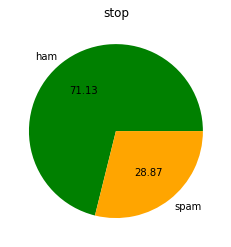

71.12676056338029% of messages containing the word "stop" are spam


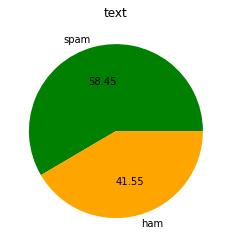

58.454106280193244% of messages containing the word "text" are spam


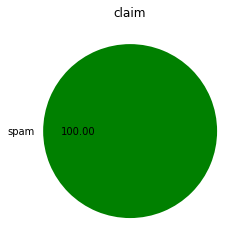

100.0% of messages containing the word "claim" are spam


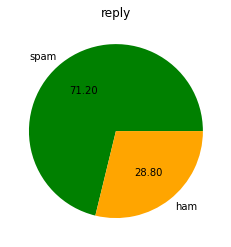

71.2% of messages containing the word "reply" are spam


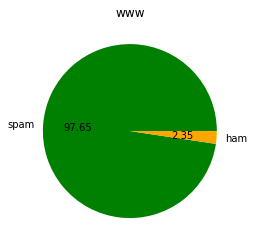

97.6470588235294% of messages containing the word "www" are spam


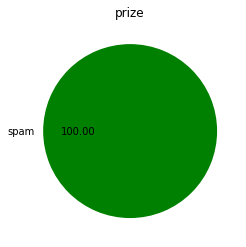

100.0% of messages containing the word "prize" are spam


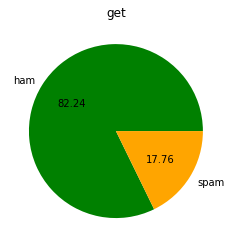

17.763157894736842% of messages containing the word "get" are spam


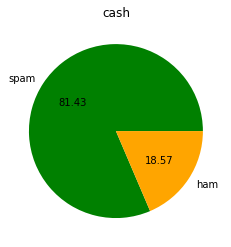

81.42857142857143% of messages containing the word "cash" are spam


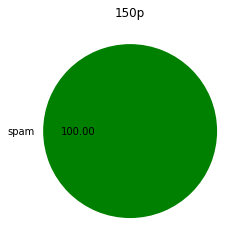

100.0% of messages containing the word "150p" are spam


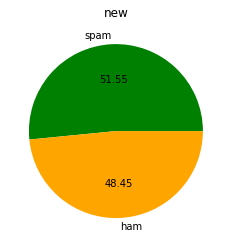

48.4472049689441% of messages containing the word "new" are spam


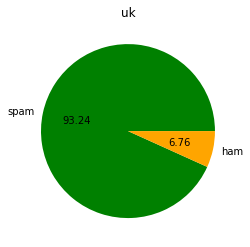

93.24324324324324% of messages containing the word "uk" are spam


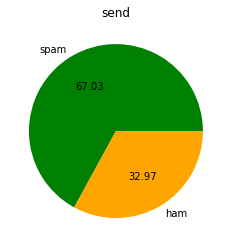

32.967032967032964% of messages containing the word "send" are spam


In [150]:
# plots pie chart to show percentage that the common ham words are in spam and ham message
for i in range(len(spam_df)):
  new=df.loc[df['preprocess_text'].str.contains(spam_df['Words'][i])]
  spam=new.loc[new['label'] == 'spam']
  ham=new.loc[new['label'] == 'ham']
  plt.pie(new['label'].value_counts(), labels=new['label'].unique(),autopct="%0.2f", colors=["green", "orange"])
  plt.title(spam_df['Words'][i])
  plt.show()
  percentage=len(spam)/len(new)*100
  print(f'{percentage}% of messages containing the word \"'+spam_df['Words'][i]+'\" are spam') 
     

# 3. Training Model

Done by Brinda

In [152]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
data_encoder=preprocessing.LabelEncoder()
df['label']=data_encoder.fit_transform(df['label'])
Y = df['label']
X = df['message']

<ipython-input-152-b737275e4724>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=data_encoder.fit_transform(df['label'])


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values,test_size = 0.2,random_state =3)

In [154]:
## using TF-IDF word vectorization technique to convert our text data into numerical format.
#https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)


In [155]:
from sklearn import svm
model = svm.SVC(kernel= 'linear')
model.fit(train_vectors,y_train)
test_pred=model.predict(test_vectors)
train_pred =model.predict(train_vectors)


# 4. Evaluate Model (Training vs Test Error)

Done by Brinda and Naomi

In [156]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [157]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.97      0.88      0.92       140

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



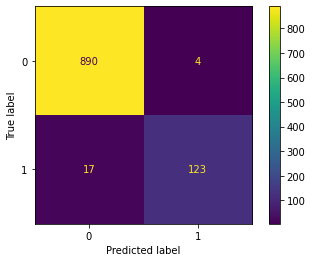

In [158]:
cm=confusion_matrix(y_test,test_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

Done by Vinh

In [159]:
from sklearn.metrics import mean_squared_error, r2_score

print('\n Train Mean squared error: %.4f' % mean_squared_error(y_train,train_pred))
print('\n Testing Mean squared error: %.4f' % mean_squared_error(y_test,test_pred))




 Train Mean squared error: 0.0036

 Testing Mean squared error: 0.0203


# 5. Where does your model fit in the fitting graph.





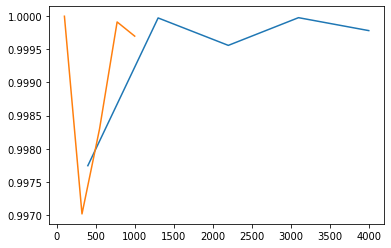

In [160]:
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, train_test_scores, fit_times, _ = learning_curve(model, train_vectors, train_pred, cv=30,return_times=True)
test_sizes, test_scores, test_test_scores, test_fit_times, _ = learning_curve(model, test_vectors, test_pred, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(test_sizes,np.mean(test_scores,axis=1))

# Second Model
Done by Caroline

array([[894,   0],
       [ 53,  87]])

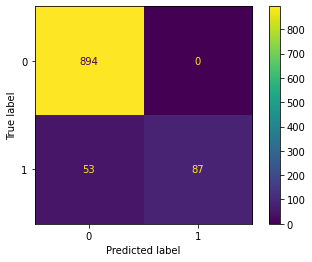

In [161]:
from sklearn.naive_bayes import MultinomialNB

model_2 = MultinomialNB().fit(train_vectors, y_train)
train_pred = model_2.predict(train_vectors)
test_pred = model_2.predict(test_vectors)

mycm = confusion_matrix(y_test, test_pred, labels = model_2.classes_)
display(mycm)
mycmdisp = ConfusionMatrixDisplay(confusion_matrix = mycm, display_labels=model_2.classes_)
mycmdisp.plot()

# Using Naive Bayes, the model classified ham messages very well, but performed poorly classifying spam messages.
# Many spam messages were incorrectly labeled as ham, making the first model much preferable for effectively flagging
# spam messages.

In [164]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3622
           1       1.00      0.73      0.85       513

    accuracy                           0.97      4135
   macro avg       0.98      0.87      0.91      4135
weighted avg       0.97      0.97      0.96      4135



In [165]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       894
           1       1.00      0.62      0.77       140

    accuracy                           0.95      1034
   macro avg       0.97      0.81      0.87      1034
weighted avg       0.95      0.95      0.94      1034



In [166]:
print('\n Train Mean squared error: %.4f' % mean_squared_error(y_train, train_pred))
print('\n Testing Mean squared error: %.4f' % mean_squared_error(y_test, test_pred))


 Train Mean squared error: 0.0329

 Testing Mean squared error: 0.0513
